In [1]:
import pandas as pd
import numpy as np 


In [2]:
url="http://codeandbeer.org/virtual/BigData/Datasets/iris.data"
names=["sepal-length","sepal-width","petal-length","petal-width","class"]
ds = pd.read_csv(url,names=names)

In [3]:
ds.shape

(150, 5)

In [4]:
ds.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
ds.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


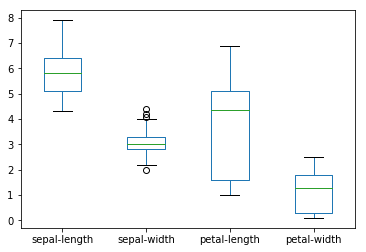

In [6]:
import matplotlib.pyplot as plt

ds.plot(kind='box')
plt.show()

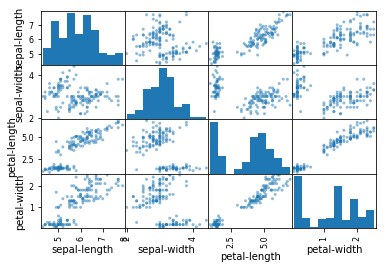

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds)
plt.show()

In [8]:
import sklearn.cluster as cluster
import numpy as np
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [9]:
ds["class"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [10]:
ds.replace({"class":{"Iris-virginica":0, "Iris-versicolor":1, "Iris-setosa": 2}}, inplace=True)

In [11]:
ds["class"].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

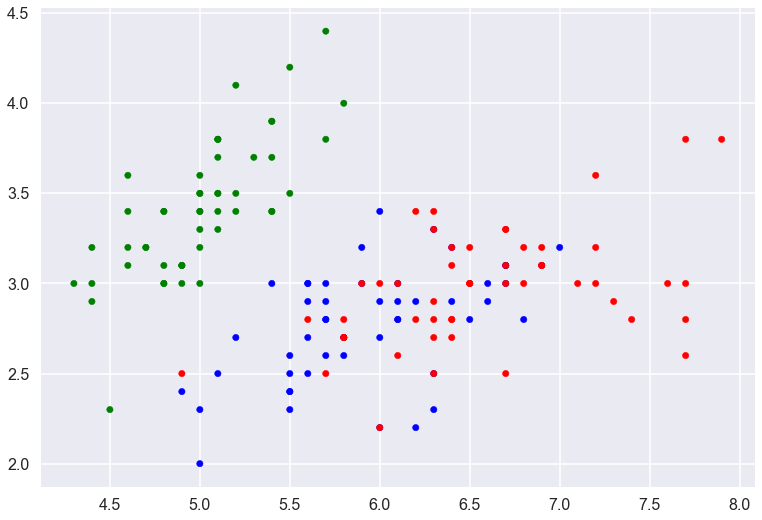

In [12]:
colors = np.array(['red','blue','green'])
plt.scatter(ds['sepal-length'], ds['sepal-width'], c=colors[ds['class']], s=40)
plt.show()

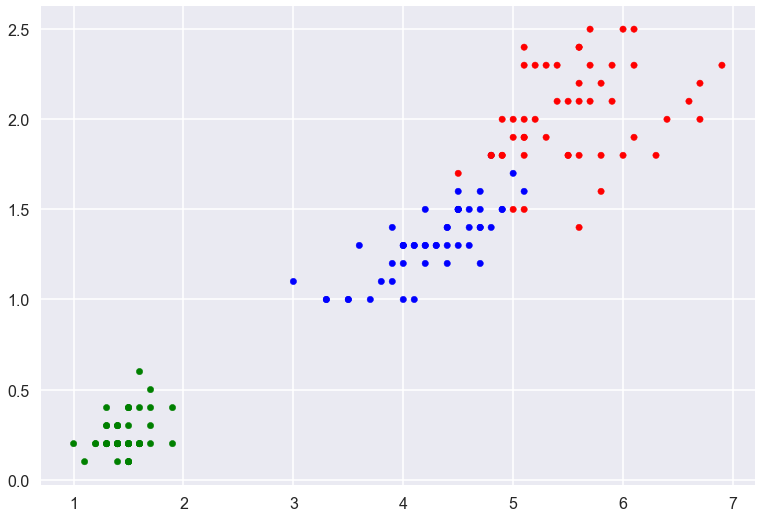

In [13]:
colors = np.array(['red','blue','green'])
plt.scatter(ds['petal-length'], ds['petal-width'], c=colors[ds['class']], s=40)
plt.show()

In [14]:
model = cluster.KMeans(n_clusters=3)

In [15]:
model.fit(ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

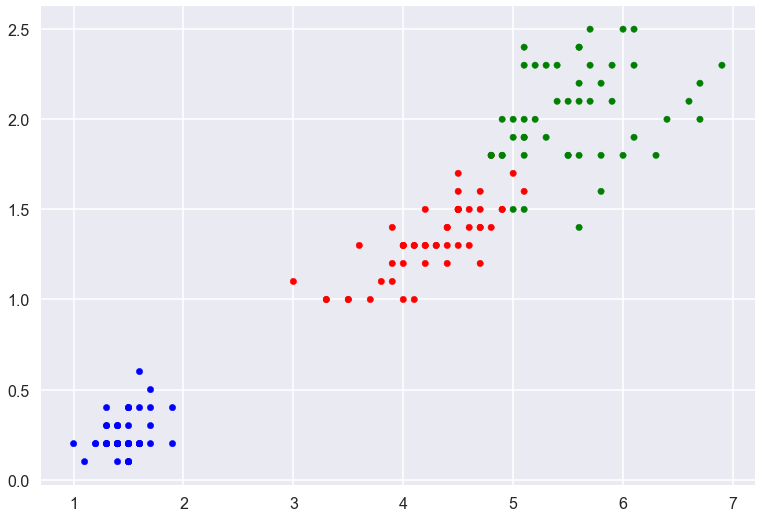

In [16]:
colors = np.array(['red','blue','green'])
plt.scatter(ds['petal-length'], ds['petal-width'], c=colors[model.labels_], s=40)
plt.show()

In [18]:
ds.replace({"class":{2:"1", 1:"0", 0:"2"}}, inplace=True)
ds.replace({"class":{"1":1, "0":0, "2":2}}, inplace=True)
import sklearn.metrics 
sklearn.metrics.accuracy_score(ds['class'], model.labels_)

0.99333333333333329

In [19]:
sklearn.metrics.confusion_matrix(ds['class'],model.labels_)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 1,  0, 49]])